<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [3]:
df = pd.read_csv("C:/Users/Dorcas/OneDrive - University of Pittsburgh/Projects/IBM Data Science Course/Machine Learning with Python/Data/loan_train.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


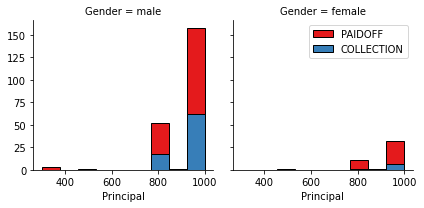

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

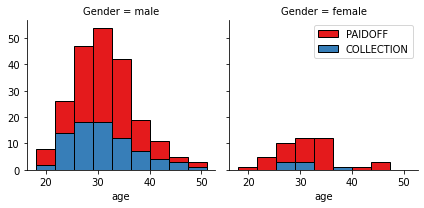

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


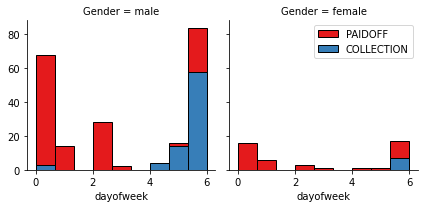

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score, f1_score, log_loss

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [22]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [23]:
#Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [24]:
#Accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8188405797101449
Test set Accuracy:  0.7


In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, yhat)*100)

Accuracy: 70.0


In [26]:
print("Classification report - \n", classification_report(y_test, yhat))
print("F1 Score:", f1_score(y_test, yhat,pos_label = "PAIDOFF")*100)

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.38      0.60      0.46        15
     PAIDOFF       0.87      0.73      0.79        55

    accuracy                           0.70        70
   macro avg       0.62      0.66      0.63        70
weighted avg       0.76      0.70      0.72        70

F1 Score: 79.20792079207921


In [27]:
#jaccard_score(y_test, yhat, pos_labels="PAIDOFF")
jaccard_score(y_test, yhat,pos_label = "PAIDOFF")

0.6557377049180327

In [28]:
# Build Model Again with K=6

In [29]:
k1 = 6
#Train Model and Predict  
neigh1 = KNeighborsClassifier(n_neighbors = k1).fit(X_train,y_train)
neigh1

KNeighborsClassifier(n_neighbors=6)

In [30]:
#Predicting
yhat1 = neigh1.predict(X_test)
yhat1[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [31]:
#Accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh1.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat1))

Train set Accuracy:  0.7971014492753623
Test set Accuracy:  0.7142857142857143


In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, yhat1)*100)

Accuracy: 71.42857142857143


In [33]:
print("Classification report - \n", classification_report(y_test, yhat1))
print("F1 Score:", f1_score(y_test, yhat1,pos_label = "PAIDOFF")*100)

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.38      0.53      0.44        15
     PAIDOFF       0.86      0.76      0.81        55

    accuracy                           0.71        70
   macro avg       0.62      0.65      0.63        70
weighted avg       0.76      0.71      0.73        70

F1 Score: 80.76923076923076


In [34]:
jaccard_score(y_test, yhat1,pos_label = "PAIDOFF")

0.6774193548387096

In [35]:
k2 = 12
#Train Model and Predict  
neigh2 = KNeighborsClassifier(n_neighbors = k2).fit(X_train,y_train)
neigh2

KNeighborsClassifier(n_neighbors=12)

In [36]:
#Predicting
yhat2 = neigh2.predict(X_test)
yhat2[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [37]:
#Accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh2.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))

Train set Accuracy:  0.782608695652174
Test set Accuracy:  0.7285714285714285


In [38]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, yhat2)*100)

Accuracy: 72.85714285714285


In [39]:
print("Classification report - \n", classification_report(y_test, yhat2))
print("F1 Score:", f1_score(y_test, yhat2,pos_label = "PAIDOFF")*100)

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.39      0.47      0.42        15
     PAIDOFF       0.85      0.80      0.82        55

    accuracy                           0.73        70
   macro avg       0.62      0.63      0.62        70
weighted avg       0.75      0.73      0.74        70

F1 Score: 82.24299065420561


In [40]:
jaccard_score(y_test, yhat2,pos_label = "PAIDOFF")

0.6984126984126984

In [41]:
k3 = 16
#Train Model and Predict  
neigh3 = KNeighborsClassifier(n_neighbors = k3).fit(X_train,y_train)
neigh3

KNeighborsClassifier(n_neighbors=16)

In [42]:
#Predicting
yhat3 = neigh3.predict(X_test)
yhat3[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [43]:
#Accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh3.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat3))

Train set Accuracy:  0.7789855072463768
Test set Accuracy:  0.7142857142857143


In [44]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, yhat3)*100)

Accuracy: 71.42857142857143


In [45]:
print("Classification report - \n", classification_report(y_test, yhat3))
print("F1 Score:", f1_score(y_test, yhat3,pos_label = "PAIDOFF")*100)

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.35      0.40      0.38        15
     PAIDOFF       0.83      0.80      0.81        55

    accuracy                           0.71        70
   macro avg       0.59      0.60      0.59        70
weighted avg       0.73      0.71      0.72        70

F1 Score: 81.4814814814815


In [46]:
jaccard_score(y_test, yhat3,pos_label = "PAIDOFF")

0.6875

In [47]:
k4 = 28
#Train Model and Predict  
neigh4 = KNeighborsClassifier(n_neighbors = k4).fit(X_train,y_train)
neigh4

KNeighborsClassifier(n_neighbors=28)

In [48]:
#Predicting
yhat4 = neigh4.predict(X_test)
yhat4[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [49]:
#Accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh4.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat4))

Train set Accuracy:  0.7391304347826086
Test set Accuracy:  0.6857142857142857


In [50]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, yhat4)*100)

Accuracy: 68.57142857142857


In [51]:
print("Classification report - \n", classification_report(y_test, yhat4))
print("F1 Score:", f1_score(y_test, yhat4,pos_label = "PAIDOFF")*100)

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.23      0.20      0.21        15
     PAIDOFF       0.79      0.82      0.80        55

    accuracy                           0.69        70
   macro avg       0.51      0.51      0.51        70
weighted avg       0.67      0.69      0.68        70

F1 Score: 80.35714285714286


In [52]:
jaccard_score(y_test, yhat4,pos_label = "PAIDOFF")

0.6716417910447762

# Decision Tree


In [53]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from IPython.display import Image  
import pydotplus
from sklearn.tree import plot_tree
from sklearn . tree import DecisionTreeClassifier , plot_tree
from sklearn.tree import export_graphviz
import sklearn.tree as tree

In [54]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [55]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV,cross_val_score

In [56]:
# Define Decision Tree classifer object
dtree = DecisionTreeClassifier()

In [57]:
# Train Decision Tree Classifer
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
#Predict the response for test dataset
dtree_pred = dtree.predict(X_test)
dtree_pred

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [59]:
print("predited: ", dtree_pred[0:5])
print("test set: ", y_test[0:5])

predited:  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
test set:  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


Text(0.5, 1.0, 'Confusion Matrix')

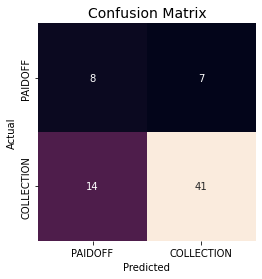

In [60]:
#Confussion Matrix
confusion_matrix(y_test, dtree_pred)


mat2 = confusion_matrix(y_test, dtree_pred)
names = np.unique(dtree_pred)
sns.heatmap(mat2, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['PAIDOFF', 'COLLECTION'], yticklabels=['PAIDOFF', 'COLLECTION'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix', fontsize=14)

In [61]:
#Accuracy of the model
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)*100))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)*100))

Accuracy on training set: 90.942
Accuracy on test set: 70.000


In [62]:
#Cross-Validation
score1 = cross_val_score(dtree, X, y, cv=10)
print("CV Score:", np.mean(score1)*100)

CV Score: 65.26050420168066


In [63]:
print("Classification report - \n", classification_report(y_test, dtree_pred))
print("F1 Score:", f1_score(y_test, dtree_pred,pos_label = "PAIDOFF" )*100)

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.36      0.53      0.43        15
     PAIDOFF       0.85      0.75      0.80        55

    accuracy                           0.70        70
   macro avg       0.61      0.64      0.61        70
weighted avg       0.75      0.70      0.72        70

F1 Score: 79.6116504854369


In [64]:
jaccard_score(y_test, dtree_pred,pos_label = "PAIDOFF")

0.6612903225806451

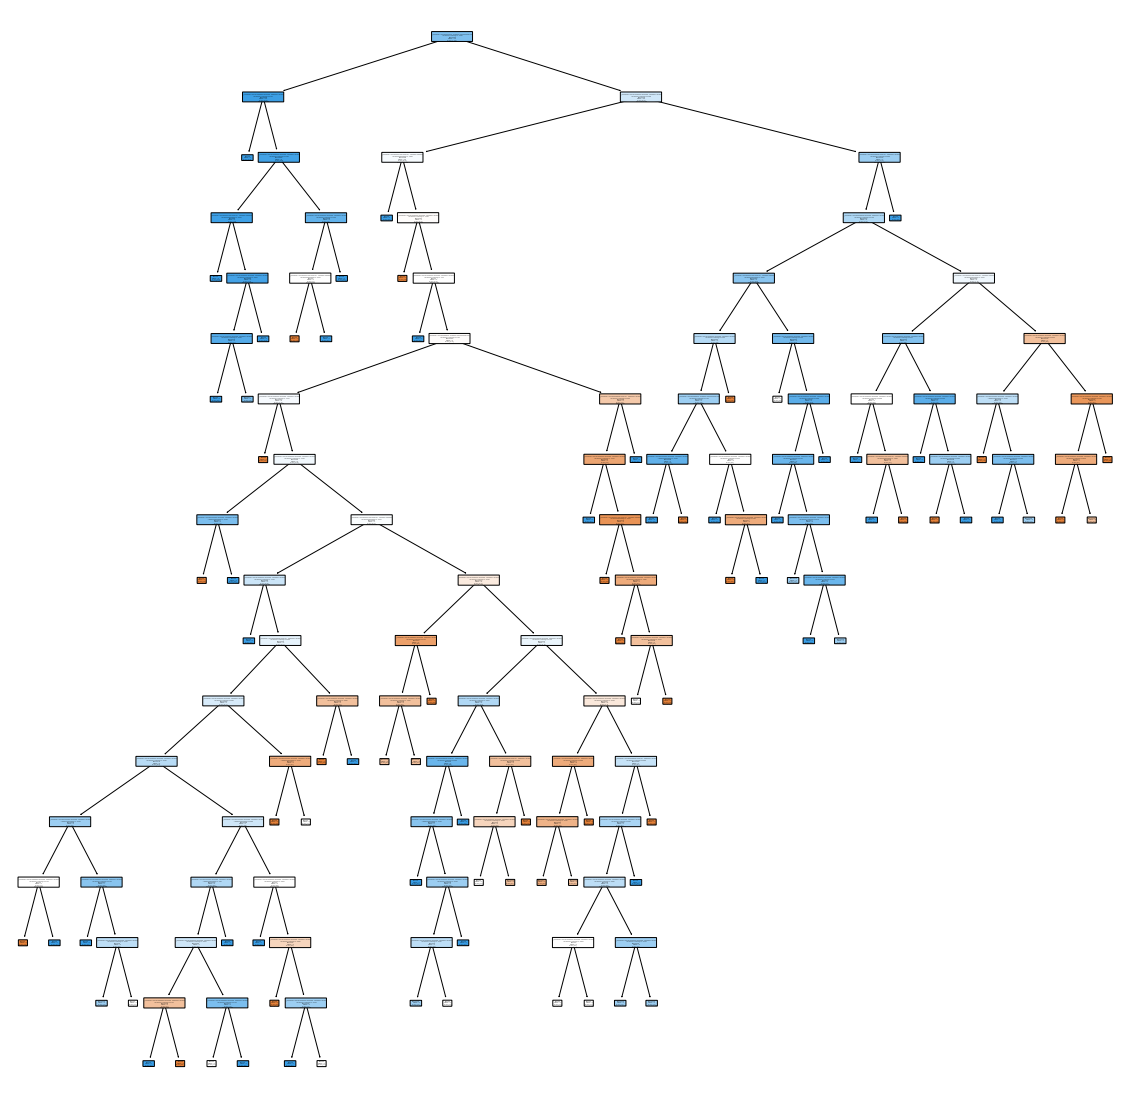

In [65]:
# Visualising the graph without the use of graphviz
plt.figure(figsize=(20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = X, 
                     class_names =["PAIDOFF", "COLLECTION"] , 
                     filled = True , precision = 4, rounded = True)

In [66]:
#Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
clf_pred = clf.predict(X_test)

In [67]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, clf_pred)*100)

Accuracy: 61.42857142857143


In [68]:
#Accuracy of the model
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)*100))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)*100))

Accuracy on training set: 74.638
Accuracy on test set: 61.429


In [69]:
print("Classification report - \n", classification_report(y_test, clf_pred))
print("F1 Score:", f1_score(y_test, clf_pred, pos_label = "PAIDOFF")*100)

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.27      0.47      0.34        15
     PAIDOFF       0.82      0.65      0.73        55

    accuracy                           0.61        70
   macro avg       0.54      0.56      0.53        70
weighted avg       0.70      0.61      0.64        70

F1 Score: 72.72727272727273


In [70]:
jaccard_score(y_test, clf_pred,pos_label = "PAIDOFF")*100

57.14285714285714

In [71]:
#Cross-Validation
score2 = cross_val_score(clf, X, y, cv=10)
print("CV Score:", np.mean(score2)*100)

CV Score: 70.01680672268907


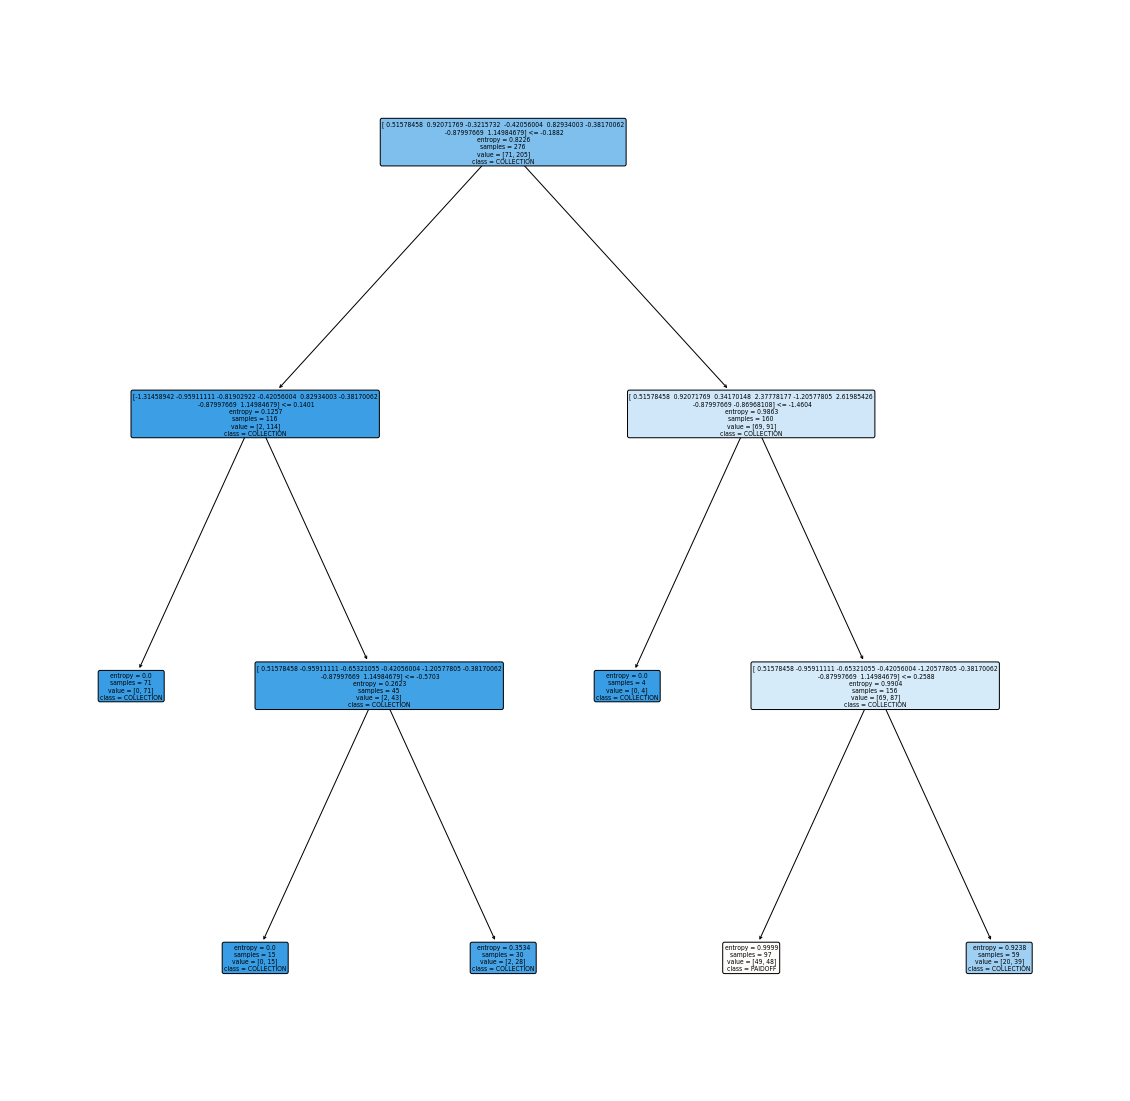

In [72]:
#Plot Prunned Tree
plt.figure(figsize=(20,20))
dec_tree1 = plot_tree(decision_tree=clf, feature_names = X, 
                     class_names =["PAIDOFF", "COLLECTION"] , 
                     filled = True , precision = 4, rounded = True)

In [73]:
#Cross-Validation
score2 = cross_val_score(clf, X, y, cv=10)
print("CV Score:", np.mean(score2)*100)

CV Score: 70.01680672268907


In [74]:
#Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=8)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
clf_pred1 = clf1.predict(X_test)

In [75]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, clf_pred1)*100)

Accuracy: 75.71428571428571


In [76]:
#Accuracy of the model
print("Accuracy on training set: {:.3f}".format(clf1.score(X_train, y_train)*100))
print("Accuracy on test set: {:.3f}".format(clf1.score(X_test, y_test)*100))

Accuracy on training set: 79.710
Accuracy on test set: 75.714


In [77]:
print("Classification report - \n", classification_report(y_test, clf_pred1))
print("F1 Score:", f1_score(y_test, clf_pred1, pos_label = "PAIDOFF")*100)

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.25      0.07      0.11        15
     PAIDOFF       0.79      0.95      0.86        55

    accuracy                           0.76        70
   macro avg       0.52      0.51      0.48        70
weighted avg       0.67      0.76      0.70        70

F1 Score: 85.95041322314049


In [78]:
jaccard_score(y_test, clf_pred1,pos_label = "PAIDOFF")*100

75.36231884057972

In [79]:
#Cross-Validation
score3 = cross_val_score(clf1, X, y, cv=10)
print("CV Score:", np.mean(score3)*100)

CV Score: 65.46218487394958


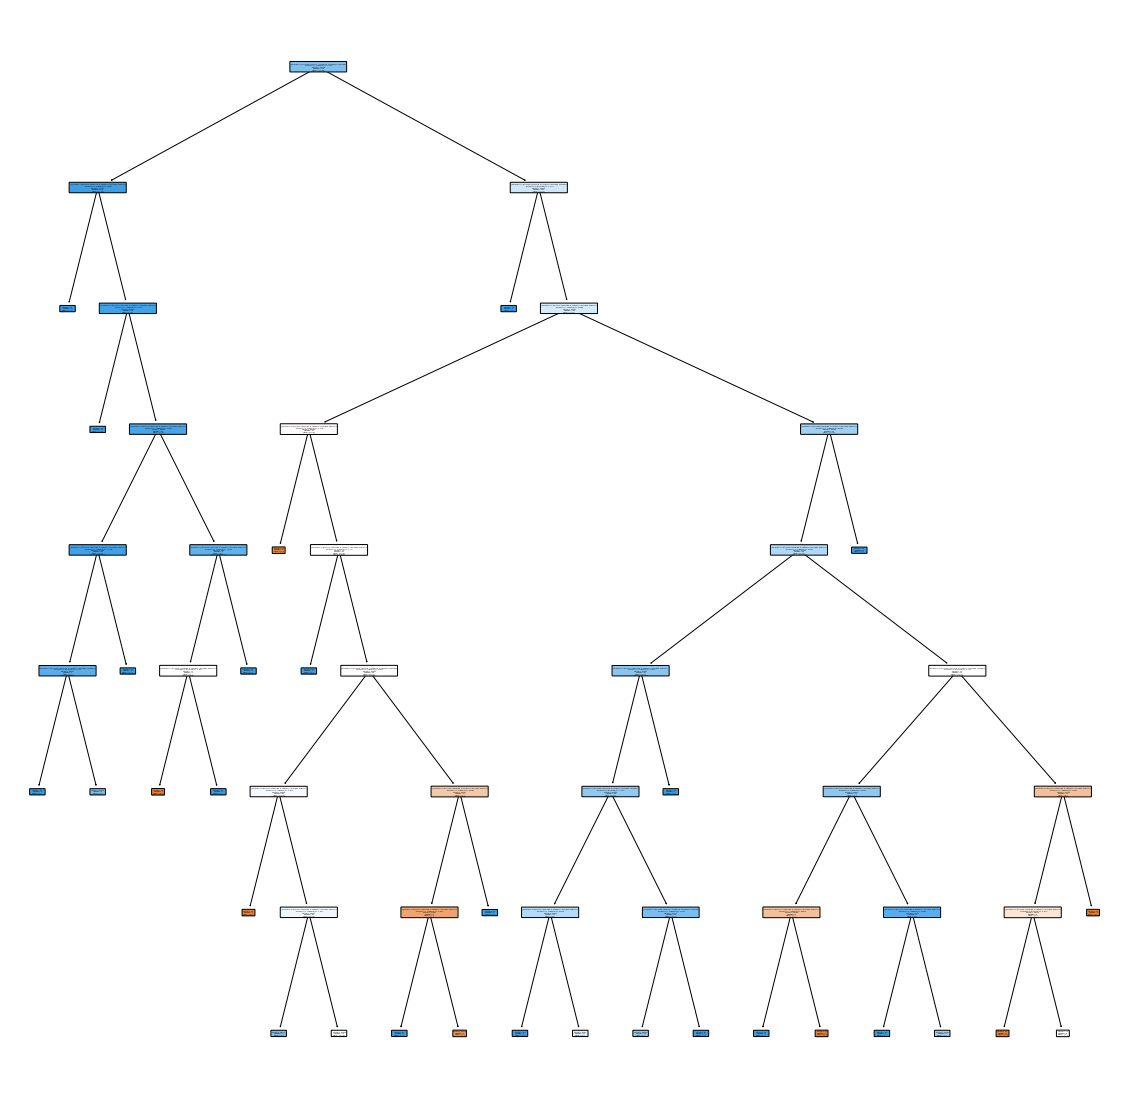

In [80]:
#Plot Prunned Tree
plt.figure(figsize=(20,20))
dec_tree2 = plot_tree(decision_tree=clf1, feature_names = X, 
                     class_names =["PAIDOFF", "COLLECTION"] , 
                     filled = True , precision = 4, rounded = True)

# Support Vector Machine


In [81]:
from sklearn import svm

In [82]:
#Define the model with the kernel
svm_model = svm.SVC(kernel='rbf')

In [83]:
#Train the model
svm_model.fit(X_train, y_train) 

SVC()

In [84]:
#Predict the label
svm_pred = svm_model.predict(X_test)
svm_pred [0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Text(0.5, 1.0, 'Confusion Matrix')

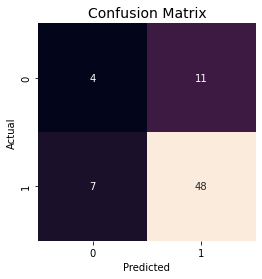

In [85]:
#Confussion Matrix
confusion_matrix(y_test, svm_pred)


mat3 = confusion_matrix(y_test, svm_pred)
names1 = np.unique(svm_pred)
sns.heatmap(mat3, square=True, annot=True, fmt='d', cbar=False) 
            #xticklabels=['PAIDOFF', 'COLLECTION'], yticklabels=['PAIDOFF', 'COLLECTION'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix', fontsize=14)

In [86]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred)*100)

Accuracy: 74.28571428571429


In [87]:
#Accuracy of the model
print("Accuracy on training set: {:.3f}".format(svm_model.score(X_train, y_train)*100))
print("Accuracy on test set: {:.3f}".format(svm_model.score(X_test, y_test)*100))

Accuracy on training set: 78.261
Accuracy on test set: 74.286


In [88]:
print("Classification report - \n", classification_report(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred, pos_label = "PAIDOFF")*100)
#print("F1 Score:", f1_score(y_test, svm_pred, average='weighted')*100) 

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

F1 Score: 84.21052631578948


In [89]:
jaccard_score(y_test, svm_pred,pos_label = "PAIDOFF")*100

72.72727272727273

In [90]:
#Cross-Validation
score4 = cross_val_score(svm_model, X, y, cv=10)
print("CV Score:", np.mean(score4)*100)

CV Score: 72.87394957983193


# Logistic Regression


In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lreg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
lreg

LogisticRegression(C=0.01, solver='liblinear')

In [93]:
lreg_pred = lreg.predict(X_test)
lreg_pred

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

In [94]:
lreg_prob = lreg.predict_proba(X_test)
lreg_prob

array([[0.5034238 , 0.4965762 ],
       [0.45206111, 0.54793889],
       [0.30814132, 0.69185868],
       [0.34259428, 0.65740572],
       [0.32025894, 0.67974106],
       [0.31680537, 0.68319463],
       [0.48830185, 0.51169815],
       [0.47823073, 0.52176927],
       [0.34259428, 0.65740572],
       [0.4934056 , 0.5065944 ],
       [0.33806706, 0.66193294],
       [0.49662231, 0.50337769],
       [0.24891907, 0.75108093],
       [0.3419095 , 0.6580905 ],
       [0.43751789, 0.56248211],
       [0.25760497, 0.74239503],
       [0.52357188, 0.47642812],
       [0.30450278, 0.69549722],
       [0.50166363, 0.49833637],
       [0.3195971 , 0.6804029 ],
       [0.44276988, 0.55723012],
       [0.49410185, 0.50589815],
       [0.51350333, 0.48649667],
       [0.47203498, 0.52796502],
       [0.40944694, 0.59055306],
       [0.50846442, 0.49153558],
       [0.51098415, 0.48901585],
       [0.37457647, 0.62542353],
       [0.50418423, 0.49581577],
       [0.25299635, 0.74700365],
       [0.

Text(0.5, 1.0, 'Confusion Matrix')

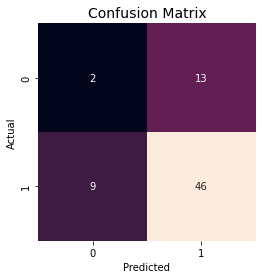

In [95]:
#Confussion Matrix
confusion_matrix(y_test, lreg_pred)


mat4 = confusion_matrix(y_test, lreg_pred)
names2 = np.unique(lreg_pred)
sns.heatmap(mat4, square=True, annot=True, fmt='d', cbar=False) 
            #xticklabels=['PAIDOFF', 'COLLECTION'], yticklabels=['PAIDOFF', 'COLLECTION'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix', fontsize=14)

In [99]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, lreg_pred)*100)

Accuracy: 68.57142857142857


In [100]:
#Accuracy of the model
print("Accuracy on training set: {:.3f}".format(lreg.score(X_train, y_train)*100))
print("Accuracy on test set: {:.3f}".format(lreg.score(X_test, y_test)*100))

Accuracy on training set: 75.725
Accuracy on test set: 68.571


In [101]:
print("Classification report - \n", classification_report(y_test, lreg_pred))
print("F1 Score:", f1_score(y_test, lreg_pred, pos_label = "PAIDOFF")*100)

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70

F1 Score: 80.70175438596492


In [102]:
jaccard_score(y_test, lreg_pred,pos_label = "PAIDOFF")*100

67.64705882352942

In [103]:
#Cross-Validation
score5 = cross_val_score(lreg, X, y, cv=10)
print("CV Score:", np.mean(score5)*100)

CV Score: 69.44537815126051


# Model Evaluation using Test set


In [96]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [97]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [98]:
#test_df = pd.read_csv('loan_test.csv')
test_df = pd.read_csv("C:/Users/Dorcas/OneDrive - University of Pittsburgh/Projects/IBM Data Science Course/Machine Learning with Python/Data/loan_test.csv")
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [109]:
#KNN
print("Classification report - \n", classification_report(y_test, yhat2))
print("F1 Score:", f1_score(y_test, yhat2,pos_label = "PAIDOFF"))
print("Jaccard Score:", jaccard_score(y_test, yhat2,pos_label = "PAIDOFF"))

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.39      0.47      0.42        15
     PAIDOFF       0.85      0.80      0.82        55

    accuracy                           0.73        70
   macro avg       0.62      0.63      0.62        70
weighted avg       0.75      0.73      0.74        70

F1 Score: 0.8224299065420562
Jaccard Score: 0.6984126984126984


In [111]:
#Decision Tree
print("Classification report - \n", classification_report(y_test, clf_pred1))
print("F1 Score:", f1_score(y_test, clf_pred1, pos_label = "PAIDOFF"))
print("Jaccard Score:", jaccard_score(y_test, clf_pred1,pos_label = "PAIDOFF"))

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.25      0.07      0.11        15
     PAIDOFF       0.79      0.95      0.86        55

    accuracy                           0.76        70
   macro avg       0.52      0.51      0.48        70
weighted avg       0.67      0.76      0.70        70

F1 Score: 0.8595041322314049
Jaccard Score: 0.7536231884057971


In [112]:
#SVM
print("Classification report - \n", classification_report(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred, pos_label = "PAIDOFF"))
print("Jaccard Score:", jaccard_score(y_test, svm_pred,pos_label = "PAIDOFF"))

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

F1 Score: 0.8421052631578948
Jaccard Score: 0.7272727272727273


In [108]:
#Logistic Regression
print("Classification report - \n", classification_report(y_test, lreg_pred))
print("F1 Score:", f1_score(y_test, lreg_pred, pos_label = "PAIDOFF"))
print("Jaccard Score:", jaccard_score(y_test, lreg_pred,pos_label = "PAIDOFF"))
print("Log Loss:", log_loss(y_test, lreg_prob))

Classification report - 
               precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70

F1 Score: 0.8070175438596492
Jaccard Score: 0.6764705882352942
Log Loss: 0.5772287609479654


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.6984  | 0.8224   | NA      |
| Decision Tree      | 0.7536  | 0.8595   | NA      |
| SVM                | 0.7272  | 0.8421   | NA      |
| LogisticRegression | 0.6764  | 0.8070   | 0.5772  |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
